# **Lab 2: Introduction to ML Methods in Audio**

Intagliata Emanuele (928166)

Surricchio Mattia (920715)

Link: https://colab.research.google.com/drive/1-HZIhU-y_5Ea5GwksbnYElsBhVxEAh0Y#scrollTo=2oZd7b5gmsTx

#**IMPORTANT: The first step is always to SAVE A COPY OF THIS NOTEBOOK in your own Google Drive and do the work on your own document.**  (File --> Save a copy in Drive)

In this lab we will explore some well-known Machine Learning methods making use of the Scikit-Learn library. We'll go through matrix factorization methods and some popular supervised and unsupervised learning techniques.


### **Exercise 1**: Importing a dataset from github

(*You don't need to do anything in this exercise but to execute the cells*)

Execute the following lines for importing the ESC-50 dataset:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd
from pathlib import Path
import sklearn
plt.style.use('seaborn')

In [ ]:
!apt-get install subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
subversion is already the newest version (1.9.7-4ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [ ]:
!svn checkout https://github.com/karolpiczak/ESC-50/trunk/audio ;
print('Done!')

Checked out revision 27.
Done!


The Github repository specifies the following naming convention:

2000 audio recordings in WAV format (5 seconds, 44.1 kHz, mono) with the following naming convention:

{FOLD}-{CLIP_ID}-{TAKE}-{TARGET}.wav

{FOLD} - index of the cross-validation fold,

{CLIP_ID} - ID of the original Freesound clip,

{TAKE} - letter disambiguating between different fragments from the same Freesound clip,

{TARGET} - class in numeric format [0, 49].

In [ ]:
# Get a list of all audio files and get the class label for each file
audiofiles = [str(file) for file in Path().glob('audio/*.wav')]
labels = []
for i,file in enumerate(audiofiles):
  fileid = file.split('.wav')[-2]
  target = fileid.split('-')[-1]
  labels.append(int(target))

### **Exercise 2**: Represent the first 5 examples of the first 2 classes


Create 2 lists containing the paths for the 2 first classes (0 and 1). Name them 'class_0' and 'class_1'.

In [ ]:
class_0 = [x for x, y in zip(audiofiles, labels) if y == 0]
class_1 = [x for x, y in zip(audiofiles, labels) if y == 1]
print('class 0:', class_0)
print('class 1:', class_1)


class 0: ['audio/5-203128-B-0.wav', 'audio/1-85362-A-0.wav', 'audio/3-157695-A-0.wav', 'audio/2-122104-B-0.wav', 'audio/1-59513-A-0.wav', 'audio/5-208030-A-0.wav', 'audio/2-122104-A-0.wav', 'audio/1-100032-A-0.wav', 'audio/5-9032-A-0.wav', 'audio/2-116400-A-0.wav', 'audio/4-207124-A-0.wav', 'audio/1-32318-A-0.wav', 'audio/4-192236-A-0.wav', 'audio/5-212454-A-0.wav', 'audio/1-110389-A-0.wav', 'audio/3-170015-A-0.wav', 'audio/1-97392-A-0.wav', 'audio/4-191687-A-0.wav', 'audio/3-155312-A-0.wav', 'audio/4-194754-A-0.wav', 'audio/1-30344-A-0.wav', 'audio/3-180977-A-0.wav', 'audio/5-231762-A-0.wav', 'audio/2-117271-A-0.wav', 'audio/3-144028-A-0.wav', 'audio/2-114280-A-0.wav', 'audio/3-136288-A-0.wav', 'audio/4-184575-A-0.wav', 'audio/5-213855-A-0.wav', 'audio/1-30226-A-0.wav', 'audio/2-114587-A-0.wav', 'audio/2-118072-A-0.wav', 'audio/4-199261-A-0.wav', 'audio/5-203128-A-0.wav', 'audio/3-163459-A-0.wav', 'audio/3-180256-A-0.wav', 'audio/4-182395-A-0.wav', 'audio/5-217158-A-0.wav', 'audio/4-1

Read the audio files with librosa and store them in a list called 'signals_0' and 'signals_1':

In [ ]:
signal_0 = list(librosa.load(p)[0] for p in class_0)
signal_1 = list(librosa.load(p)[0] for p in class_1)

In [ ]:
len(signal_0)

40

Disply the 5 first examples of the first 2 classes in a subplot of 2 rows and 5 columns:


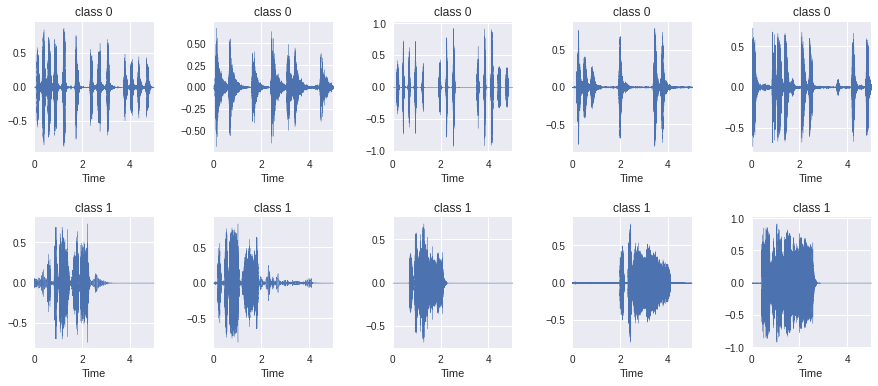

In [ ]:
temp_class_0 = signal_0[:5]
temp_class_1 = signal_1[:5]
elements = temp_class_0 + temp_class_1

plt.figure(figsize=(15,6))
for i,x in enumerate(elements):
  plt.subplot(2,5, i+1)
  librosa.display.waveplot(x)
  plt.subplots_adjust(hspace=0.5)
  plt.subplots_adjust(wspace=0.5)

  if(i<5):
    plt.title('class 0')
  else:
    plt.title('class 1')
  
 

### **Exercise 3**: NMF Decomposition


Listen to the first signal of class 0:

In [ ]:
sr = 22050
ipd.Audio(signal_0[0], rate = sr)

Listen to the first signal of class 1:

In [ ]:
ipd.Audio(signal_1[0], rate = sr)

Mix both signals together in a new array called 'audiomix':


In [ ]:
audiomix = signal_0[0]/signal_0[0].max() + signal_1[0]/signal_1[0].max()
audiomix = 0.5 * audiomix / audiomix.max()
ipd.Audio(audiomix, rate = sr)

Decompose the 'audiomix' with 2 components using NMF:

In [ ]:
n_components = 2
S = librosa.stft(audiomix)
X, X_phase = librosa.magphase(S)

W, H = librosa.decompose.decompose(X, n_components=n_components)
print(W.shape, H.shape)
print(np.dot(W,H))

(1025, 2) (2, 216)
[[1.29901601e+00 1.56869727e+00 1.13770491e+00 ... 6.58484667e-02
  5.98866097e-02 5.34813529e-02]
 [1.32583793e+00 1.60314805e+00 1.20033734e+00 ... 7.94974293e-02
  7.06859354e-02 5.99092839e-02]
 [5.67002002e-01 6.86628016e-01 5.32949744e-01 ... 4.01573052e-02
  3.50223976e-02 2.82889171e-02]
 ...
 [1.23913542e-05 1.49232465e-05 1.00812640e-05 ... 3.85950301e-07
  3.82810589e-07 4.05249447e-07]
 [1.25033510e-05 1.50471844e-05 9.96451072e-06 ... 3.24172595e-07
  3.35484568e-07 3.80639410e-07]
 [1.17849441e-05 1.41826160e-05 9.39197832e-06 ... 3.05546561e-07
  3.16208581e-07 3.58768954e-07]]


Compare the original and approximated spectrum:

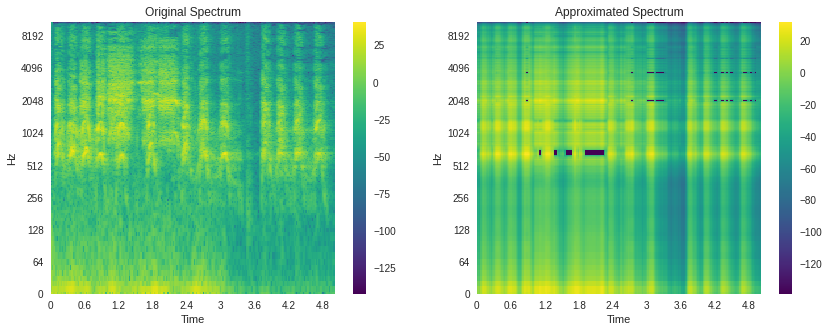

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
librosa.display.specshow(20*np.log10(X), sr = sr, x_axis = 'time', y_axis = 'log', cmap = 'viridis')
plt.title('Original Spectrum')
plt.colorbar();

plt.subplot(1,2,2)
librosa.display.specshow(20*np.log10(np.dot(W,H)+ np.finfo(np.float32).eps), sr = sr, x_axis = 'time', y_axis = 'log', cmap = 'viridis')
plt.title('Approximated Spectrum')
plt.colorbar();



Represent the learned spectral patterns:


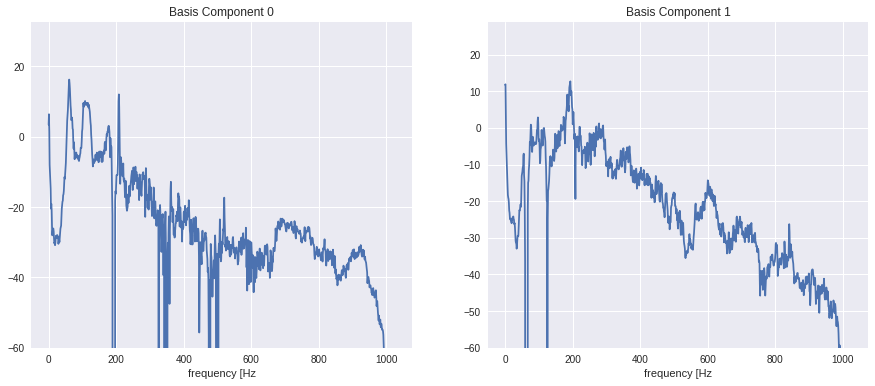

In [ ]:
plt.figure(figsize=(15,6))

for i in range(n_components):
  plt.subplot(1,2,i+1)
  plt.plot(20*np.log10(W[:,i]+ np.finfo(float).eps))
  plt.ylim(bottom=-60)
  plt.xlabel('frequency [Hz')
  plt.title('Basis Component {}'.format(i))

Represent the learned temporal activations:

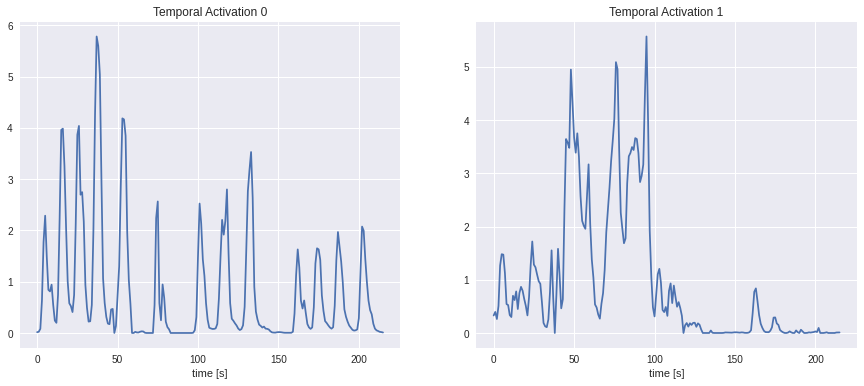

In [ ]:
t_frames = librosa.frames_to_time(np.arange(H.shape[1]))

plt.figure(figsize=(15,6))

for i in range(n_components):
  plt.subplot(1,2,i+1)
  plt.plot(H[i,:])
  plt.xlabel('time [s]')
  plt.title('Temporal Activation {}'.format(i))

Reconstruct the temporal signal of each component (use the phase information of the original mix signal)

In [ ]:
reconstructed_signals = []

for i in range(n_components):

  new_component = np.dot(np.expand_dims(W[:,i], axis=1), np.expand_dims(H[i,:], axis=0))
  new_component = new_component * np.exp(1j*X_phase)
  reconstructed_signals.append(librosa.core.istft(new_component))

len(reconstructed_signals)

2

Listen to the first component:

In [ ]:
ipd.Audio(reconstructed_signals[0], rate = sr)

Listen to the second component:

In [ ]:
ipd.Audio(reconstructed_signals[1], rate = sr)

### **Exercise 4**: Harmonic-Percussive Decomposition

Now, apply librosa's harmonic-percussive source separation to extract again two components and discuss the perceived differences.

In [ ]:
Hmn, Prs = librosa.decompose.hpss(X)

Represent the spectrograms of the two separated components.

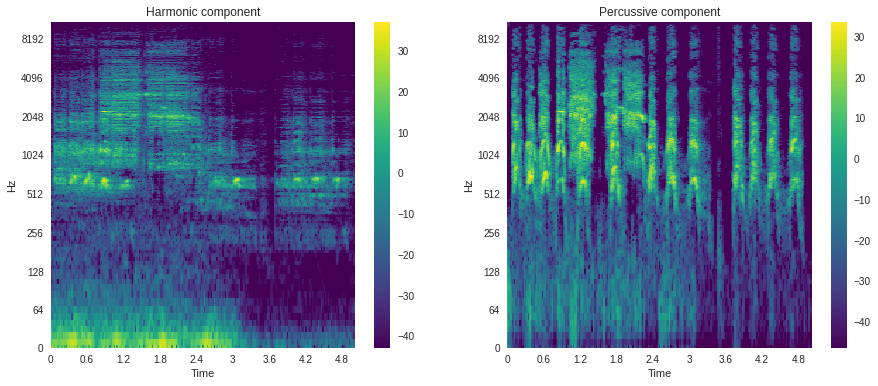

In [ ]:
Hmag = librosa.amplitude_to_db(Hmn)
Pmag = librosa.amplitude_to_db(Prs)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
librosa.display.specshow(Hmag, sr=sr, x_axis='time', y_axis = 'log', cmap='viridis')
plt.title('Harmonic component')
plt.colorbar();

plt.subplot(1,2,2)
librosa.display.specshow(Pmag, sr=sr, x_axis='time', y_axis = 'log', cmap='viridis')
plt.title('Percussive component')
plt.colorbar();


Listen to the first component.

In [ ]:
h = librosa.istft(Hmn)
print('Harmonic component')
ipd.Audio(h, rate= sr)

Harmonic component


Listen to the second component.

In [ ]:
p = librosa.istft(Prs)
print('Percussive component')
ipd.Audio(p, rate= sr)

Percussive component


### **Exercise 5**: Feature Extraction

Compute the mean ZCR and standard deviation of the spectral flatness for the examples in signals_0 (dogs) and signals_1 (rooster). Define a function to extract those features (call it 'extract_features') and store the extracted features into two arrays: 'dog_features' and 'rooster_features'

In [ ]:
# Function definition

def extract_features(signal):

  return[
         np.mean(librosa.feature.zero_crossing_rate(signal)),
         np.std(librosa.feature.spectral_flatness(signal))
  ]
  

In [ ]:
# Feature Extraction
dog_features = np.array([extract_features(x) for x in signal_0])
rooster_features = np.array([extract_features(x) for x in signal_1])

print(dog_features.shape, rooster_features.shape)

(40, 2) (40, 2)


Represent the histograms for each feature for the two classes:

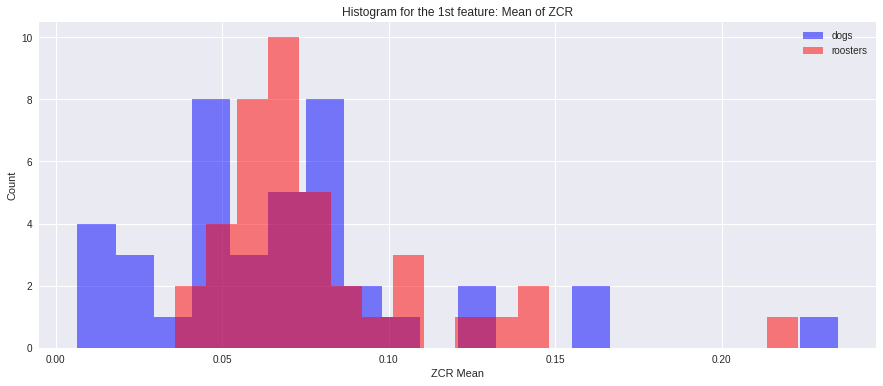

In [ ]:
# Histogram for the first feature
plt.figure(figsize=(15,6));
plt.hist(dog_features[:,0], color='b', alpha = 0.5, bins=20);
plt.hist(rooster_features[:,0], color='r', alpha = 0.5, bins=20);

plt.legend(('dogs', 'roosters'));
plt.ylabel('Count');
plt.xlabel('ZCR Mean');
plt.title('Histogram for the 1st feature: Mean of ZCR');

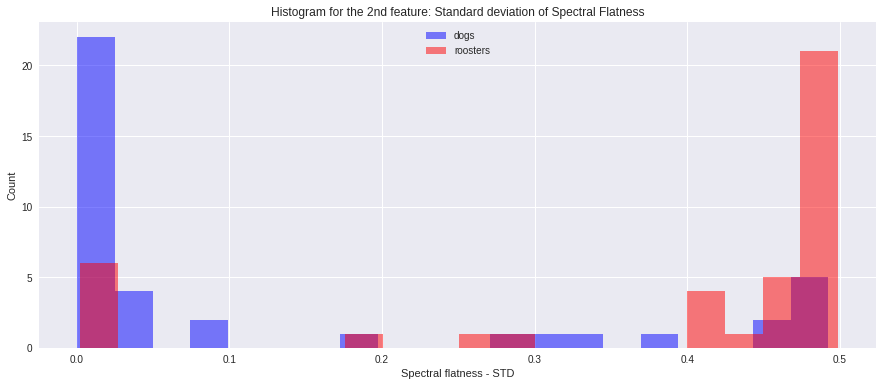

In [ ]:
# Histogram for the second feature
plt.figure(figsize=(15,6))
plt.hist(dog_features[:,1], color='b', alpha = 0.5, bins=20)
plt.hist(rooster_features[:,1], color='r', alpha = 0.5, bins=20)

plt.legend(('dogs', 'roosters'))
plt.ylabel('Count')
plt.xlabel('Spectral flatness - STD')
plt.title('Histogram for the 2nd feature: Standard deviation of Spectral Flatness');

Discuss which of the two features seems to be better for classification.

# Discussion
The second feature is the best. The mentioned feature space (**Spectral Flatness - Standard Deviation**) is the one that achieves the highest separability between the two classes. In fact, besided some noisy values, the vast majority of **Dogs** samples have a **Specral Flatness STD** lower than 0.25, while on the other side, the vast majority of **Rooster** samples have a Spectral Flatness STD higher than 0.25. Thus even a simple linear classifier in this space (which simply bianry splits samples using a treshold equal to 0.25) is enough to achieve good classification performances. 

Represent a scatter plot of the two features for each class:

(80, 2)


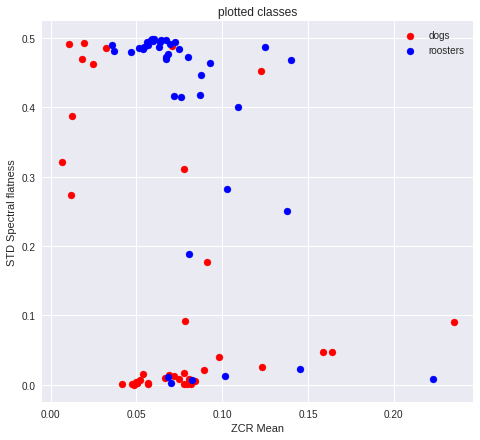

In [ ]:
feature_table = np.vstack((dog_features, rooster_features))
print(feature_table.shape)

labels_gt = np.hstack([np.zeros((40,)), np.ones((40,))])

plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
plt.scatter(feature_table[labels_gt==0,0], feature_table[labels_gt==0,1], c='r')
plt.scatter(feature_table[labels_gt==1,0], feature_table[labels_gt==1,1], c='b')

plt.xlabel('ZCR Mean')
plt.ylabel('STD Spectral flatness')

plt.title('plotted classes');
plt.legend(('dogs', 'roosters'));


### **Exercise 6**: Principal Component Analysis

Redefine the feature extractor to extract 3 features, adding to the previous ones the mean value of the spectral centroid.

In [ ]:
# Function definition
def extract_features(signal):

  return[
         np.mean(librosa.feature.zero_crossing_rate(signal)),
         np.std(librosa.feature.spectral_flatness(signal)),
         np.mean(librosa.feature.spectral_centroid(signal))
  ]

In [ ]:
# Feature extraction
dog_features = np.array([extract_features(x) for x in signal_0])
rooster_features = np.array([extract_features(x) for x in signal_1])

print(dog_features.shape, rooster_features.shape)

(40, 3) (40, 3)


Create a matrix 'feature_table' stacking all the features a use sklearn 'scale' over such matrix. Create as well a label vector indicating the true label for each row of 'feature_table'

In [ ]:
feature_table = np.vstack((dog_features, rooster_features))
print(feature_table.shape)

labels_gt = np.hstack([np.zeros((40,)), np.ones((40,))])

feature_table = sklearn.preprocessing.scale(feature_table, axis=0)

print('mean per column:',feature_table.mean(axis=0))
print('std per column:',feature_table.std(axis=0))

(80, 3)
mean per column: [-1.77635684e-16 -5.68989300e-17 -7.04297731e-16]
std per column: [1. 1. 1.]


Represent each example in a 3D feature space scatterplot:

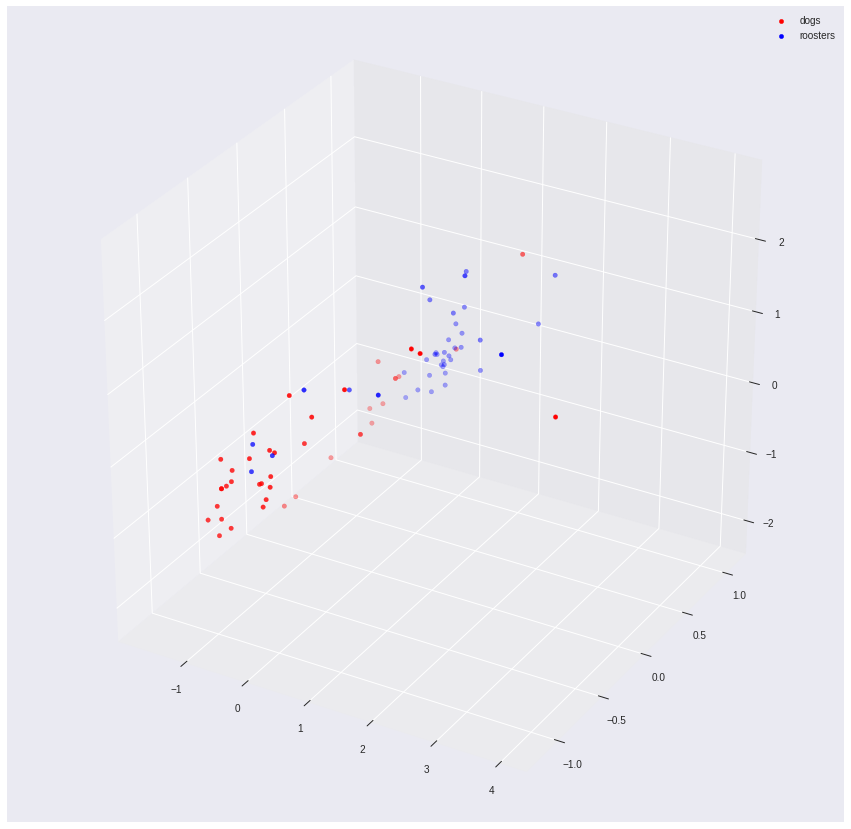

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature_table[labels_gt==0,0], feature_table[labels_gt==0,1], feature_table[labels_gt==0,2], c='r')
ax.scatter(feature_table[labels_gt==1,0], feature_table[labels_gt==1,1], feature_table[labels_gt==1,2], c='b')

plt.legend(('dogs', 'roosters'));

Apply PCA for reducing the dimensionality to two dimensions and plot the corresponding scatterplot:

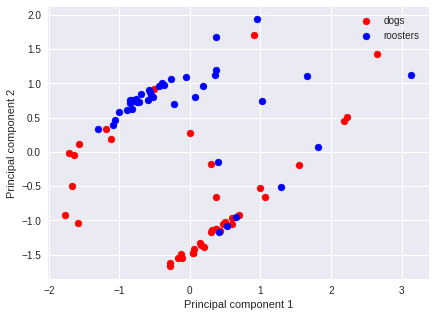

In [ ]:
n_comp = 2
model = sklearn.decomposition.PCA(n_components=n_comp, whiten=True)
model.fit(feature_table)
Y = model.transform(feature_table)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(Y[labels_gt==0,0], Y[labels_gt==0,1], c='r')
plt.scatter(Y[labels_gt==1,0], Y[labels_gt==1,1], c='b')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

plt.legend(('dogs', 'roosters'));

### **Exercise 7**: Support Vector Machines

Fit a linear SVM classifier with parameter C=1 to the PCA transformed data. Use the following helper function to draw the classifier hyperplanes of interest:


In [ ]:
def draw_classplane(ax,model,xrange):
  w = model.coef_[0]
  b = model.intercept_[0]
  a = -w[0] / w[1]
  xx = np.linspace(-3, 3)
  yy = a * xx - (b/ w[1])
  margin = 1 / np.sqrt(np.sum(w** 2))
  yy_down = yy - np.sqrt(1 + a ** 2) * margin
  yy_up = yy + np.sqrt(1 + a ** 2) * margin
  ax.plot(xx, yy, 'k-')
  ax.plot(xx, yy_down, 'k--')
  ax.plot(xx, yy_up, 'k--')

In [ ]:
# Model fitting
penalty = 1
model = sklearn.svm.SVC(kernel='linear', C=penalty)
model.fit(Y, labels_gt)
predicted_labels = model.predict(Y)
Y_PCA = Y
print(predicted_labels)

[0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1.]


Represent two subplots to compare the ground truth data and the classification result. Plot the classification hyperplanes and margin.

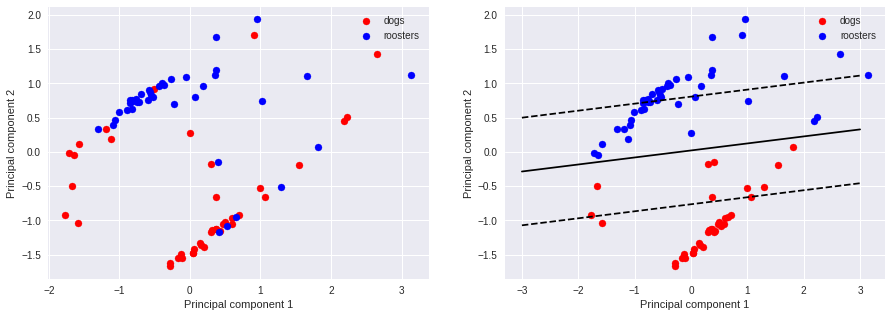

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(Y[labels_gt==0,0], Y[labels_gt==0,1], c='r')
plt.scatter(Y[labels_gt==1,0], Y[labels_gt==1,1], c='b')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend(('dogs', 'roosters'));

plt.subplot(1,2,2)
plt.scatter(Y[predicted_labels==0,0], Y[predicted_labels==0,1], c='r')
plt.scatter(Y[predicted_labels==1,0], Y[predicted_labels==1,1], c='b')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend(('dogs', 'roosters'));

#plane
draw_classplane(plt.gca(), model, (-1,1))

Compute the accuracy of the classification result using sklearn:

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_gt, predicted_labels)
print('Accuracy:', acc)

Accuracy: 0.7875


Now, apply a RBF kernel for non-linear classification:

In [ ]:
# Model fitting
penalty = 1
model = sklearn.svm.SVC(kernel='rbf', C=penalty)
model.fit(Y, labels_gt)
predicted_labels = model.predict(Y)
print(predicted_labels)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1.]


Draw the resulting classification contour and compute the accuracy:

Accuracy: 0.85


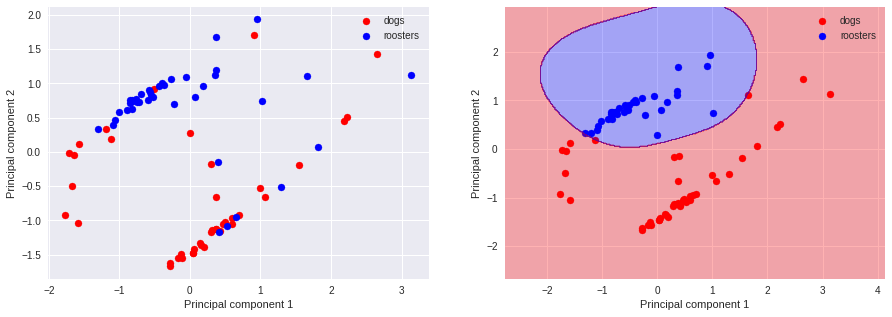

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(Y[labels_gt==0,0], Y[labels_gt==0,1], c='r')
plt.scatter(Y[labels_gt==1,0], Y[labels_gt==1,1], c='b')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend(('dogs', 'roosters'))

plt.subplot(1,2,2)
h = 0.02
x_min, x_max = Y[:,0].min() -1, Y[:,0].max(0)+1
y_min, y_max = Y[:,1].min()-1, Y[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(Y[predicted_labels==0,0], Y[predicted_labels==0,1], c='r')
plt.scatter(Y[predicted_labels==1,0], Y[predicted_labels==1,1], c='b')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend(('dogs', 'roosters'))

cs = plt.contourf(xx,yy,Z, alpha=0.3, colors=['red', 'blue'], extend= 'both')
cs.cmap.set_over('blue')
cs.cmap.set_under('red')
cs.changed()

acc = accuracy_score(labels_gt, predicted_labels)
print('Accuracy:', acc)

Experiment with different parameters of C. Try different values also for the "gamma" parameter of the RBF kernel.

Find a combination of parameters representing an overfitting and underfitting.


[0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1.]
Accuracy: 0.7875


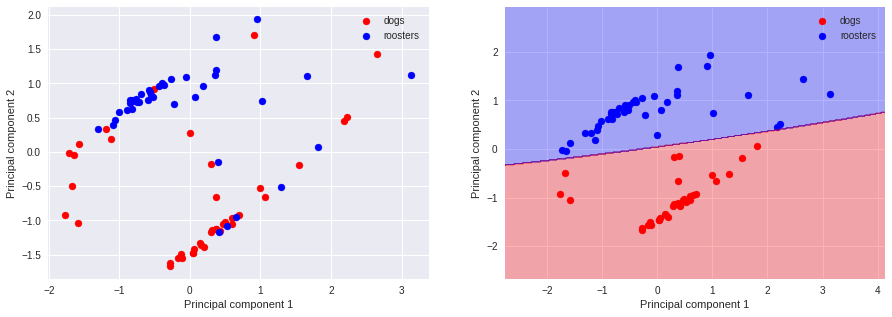

In [ ]:
# UNDERFITTING

# Model fitting
penalty = 0.1
model = sklearn.svm.SVC(kernel='rbf', C=penalty, gamma = 0.01)
model.fit(Y, labels_gt)
predicted_labels = model.predict(Y)
print(predicted_labels)


plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(Y[labels_gt==0,0], Y[labels_gt==0,1], c='r')
plt.scatter(Y[labels_gt==1,0], Y[labels_gt==1,1], c='b')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend(('dogs', 'roosters'))

plt.subplot(1,2,2)
h = 0.02
x_min, x_max = Y[:,0].min() -1, Y[:,0].max(0)+1
y_min, y_max = Y[:,1].min()-1, Y[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(Y[predicted_labels==0,0], Y[predicted_labels==0,1], c='r')
plt.scatter(Y[predicted_labels==1,0], Y[predicted_labels==1,1], c='b')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend(('dogs', 'roosters'))

cs = plt.contourf(xx,yy,Z, alpha=0.3, colors=['red', 'blue'], extend= 'both')
cs.cmap.set_over('blue')
cs.cmap.set_under('red')
cs.changed()

acc = accuracy_score(labels_gt, predicted_labels)
print('Accuracy:', acc)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy: 1.0


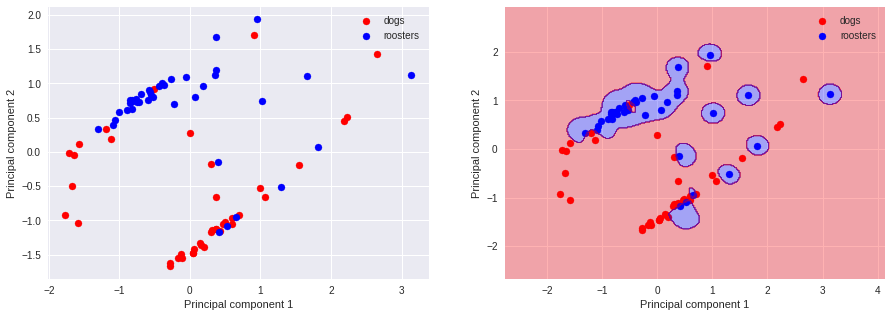

In [ ]:
# OVERFITTING

# Model fitting
penalty = 1000
model = sklearn.svm.SVC(kernel='rbf', C=penalty, gamma = 20)
model.fit(Y, labels_gt)
predicted_labels = model.predict(Y)
print(predicted_labels)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(Y[labels_gt==0,0], Y[labels_gt==0,1], c='r')
plt.scatter(Y[labels_gt==1,0], Y[labels_gt==1,1], c='b')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend(('dogs', 'roosters'))

plt.subplot(1,2,2)
h = 0.02
x_min, x_max = Y[:,0].min() -1, Y[:,0].max(0)+1
y_min, y_max = Y[:,1].min()-1, Y[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(Y[predicted_labels==0,0], Y[predicted_labels==0,1], c='r')
plt.scatter(Y[predicted_labels==1,0], Y[predicted_labels==1,1], c='b')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend(('dogs', 'roosters'))

cs = plt.contourf(xx,yy,Z, alpha=0.3, colors=['red', 'blue'], extend= 'both')
cs.cmap.set_over('blue')
cs.cmap.set_under('red')
cs.changed()

acc = accuracy_score(labels_gt, predicted_labels)
print('Accuracy:', acc)

### **Exercise 8**: k-Means Clustering

Cluster the PCA projected data into two groups using k-Means.

In [ ]:
Xdata = Y_PCA

scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-2,+2))
Xdata_scl = scaler.fit_transform(Xdata)
model = sklearn.cluster.KMeans(n_clusters = 2)

# Labels
labels = model.fit_predict(Xdata_scl)
centroids = model.cluster_centers_
print('Labels: ', labels)
print('Centroids: ', centroids)

Labels:  [1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1
 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0]
Centroids:  [[-0.71690944  0.7302766 ]
 [-0.35704109 -1.27236401]]


Represent the scatterplots of the original data and the two resultant clusters. Plot the final k-Means centroids as well.

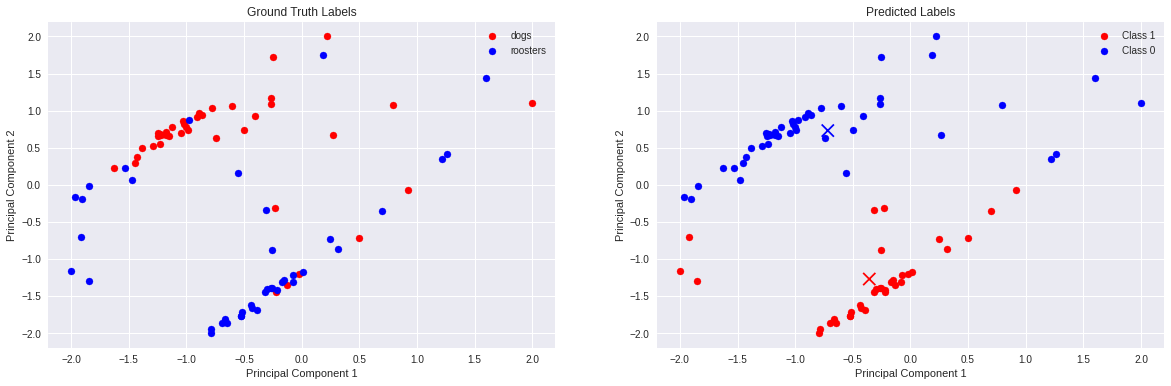

In [ ]:
# Plots 
plt.figure(figsize=(20,6))
plt.subplot(1,2,1);
plt.scatter(Xdata_scl[labels_gt==1,0], Xdata_scl[labels_gt==1,1], c='r')
plt.scatter(Xdata_scl[labels_gt==0,0], Xdata_scl[labels_gt==0,1], c='b')
plt.title('Ground Truth Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(('dogs', 'roosters'));

plt.subplot(1,2,2);
plt.scatter(Xdata_scl[labels==1,0], Xdata_scl[labels==1,1], c='r')
plt.scatter(Xdata_scl[labels==0,0], Xdata_scl[labels==0,1], c='b')
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=150, linewidths = 5, zorder = 10, c=['blue','red']) # centroids
plt.title('Predicted Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(('Class 1', 'Class 0'));

### **Exercise 9**: k-NN

Fit a k-NN classifier to the same data and experiment with different k parameters. Discuss the results.

Labels:  [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1.]


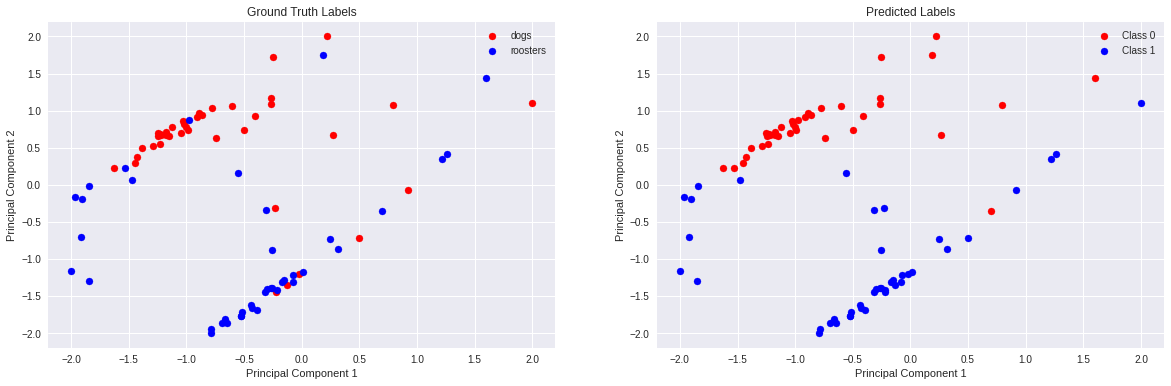

In [ ]:
Xdata = Y_PCA

# Scaling
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-2,+2))
Xdata_scl = scaler.fit_transform(Xdata)

# Model fit
k_param = 3
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors= k_param)
model.fit(Xdata_scl, labels_gt)

# Labels
labels = model.predict(Xdata_scl)
print('Labels: ', labels)

# Plots 
plt.figure(figsize=(20,6))
plt.subplot(1,2,1);
plt.scatter(Xdata_scl[labels_gt==1,0], Xdata_scl[labels_gt==1,1], c='r')
plt.scatter(Xdata_scl[labels_gt==0,0], Xdata_scl[labels_gt==0,1], c='b')
plt.title('Ground Truth Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(('dogs', 'roosters'));

plt.subplot(1,2,2);
plt.scatter(Xdata_scl[labels==1,0], Xdata_scl[labels==1,1], c='r')
plt.scatter(Xdata_scl[labels==0,0], Xdata_scl[labels==0,1], c='b')
plt.title('Predicted Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(('Class 0', 'Class 1'));

We can use diffenent k parameters i.e the **number of neighbors** to use.
For example we can use *k=3,6,9*.

Labels with k=3:  [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1.]
Labels with k=6:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1.]
Labels with k=9:  [0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1.]


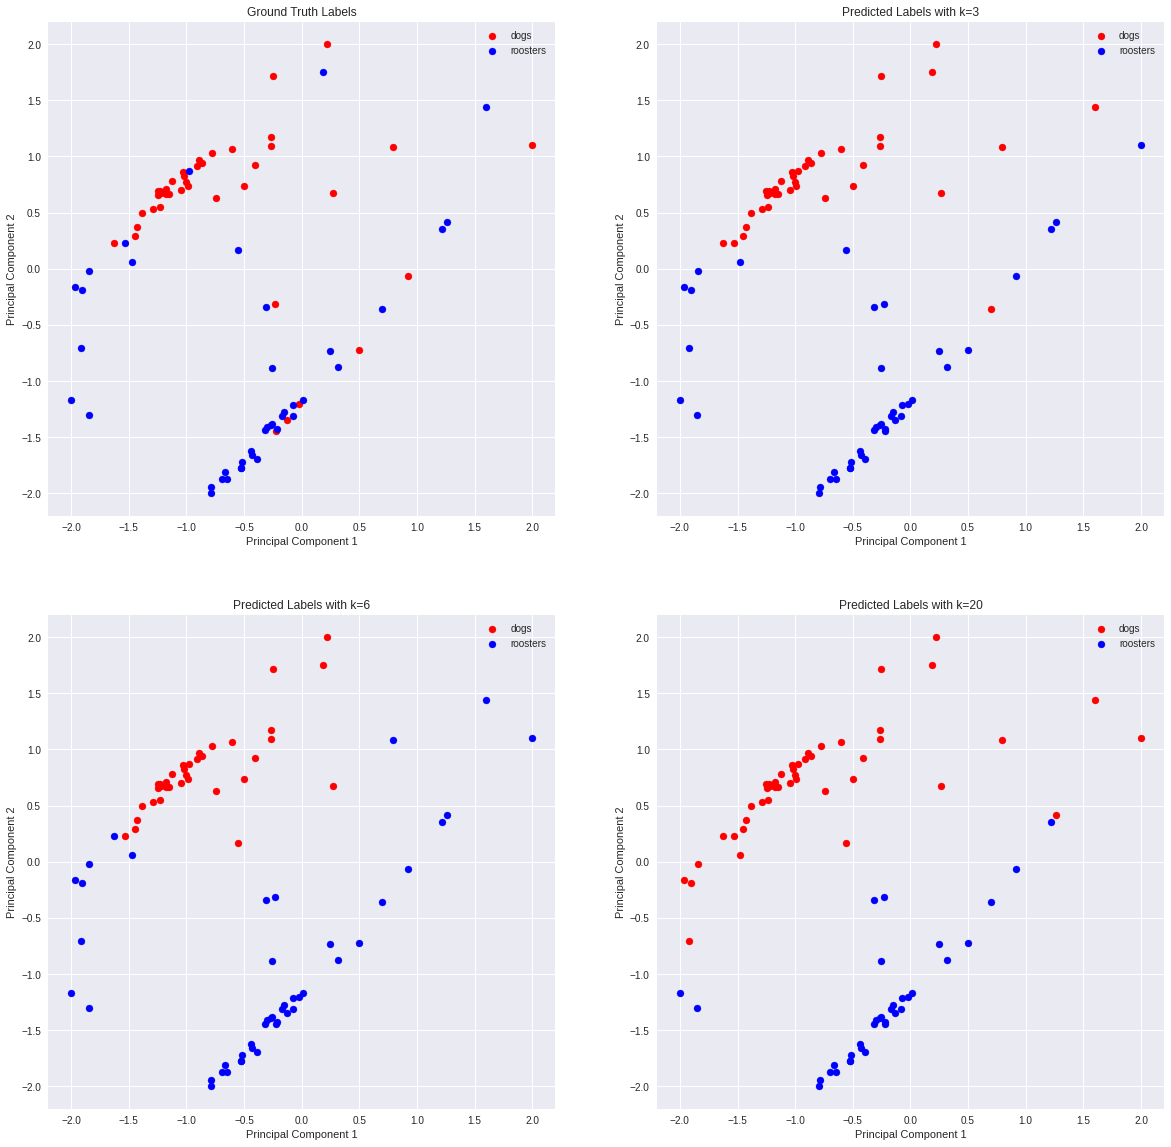

In [ ]:
# Model fit
model3 = sklearn.neighbors.KNeighborsClassifier(n_neighbors= 3)
model3.fit(Xdata_scl, labels_gt)
model6 = sklearn.neighbors.KNeighborsClassifier(n_neighbors= 6)
model6.fit(Xdata_scl, labels_gt)
model20 = sklearn.neighbors.KNeighborsClassifier(n_neighbors= 20)
model20.fit(Xdata_scl, labels_gt)

# Labels
labels3 = model3.predict(Xdata_scl)
print('Labels with k=3: ', labels3)
labels6 = model6.predict(Xdata_scl)
print('Labels with k=6: ', labels6)
labels20 = model20.predict(Xdata_scl)
print('Labels with k=9: ', labels20)

# Plots 
plt.figure(figsize=(20,20))
plt.subplot(2,2,1);
plt.scatter(Xdata_scl[labels_gt==1,0], Xdata_scl[labels_gt==1,1], c='r')
plt.scatter(Xdata_scl[labels_gt==0,0], Xdata_scl[labels_gt==0,1], c='b')
plt.title('Ground Truth Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(('dogs', 'roosters'));

plt.subplot(2,2,2);
plt.scatter(Xdata_scl[labels3==1,0], Xdata_scl[labels3==1,1], c='r')
plt.scatter(Xdata_scl[labels3==0,0], Xdata_scl[labels3==0,1], c='b')
plt.title('Predicted Labels with k=3')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(('dogs', 'roosters'));

plt.subplot(2,2,3);
plt.scatter(Xdata_scl[labels6==1,0], Xdata_scl[labels6==1,1], c='r')
plt.scatter(Xdata_scl[labels6==0,0], Xdata_scl[labels6==0,1], c='b')
plt.title('Predicted Labels with k=6')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(('dogs', 'roosters'));

plt.subplot(2,2,4);
plt.scatter(Xdata_scl[labels20==1,0], Xdata_scl[labels20==1,1], c='r')
plt.scatter(Xdata_scl[labels20==0,0], Xdata_scl[labels20==0,1], c='b')
plt.title('Predicted Labels with k=20')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(('dogs', 'roosters'));

Increasing the value of k reduces effect of noisy input data on the classification, but reduces the ability to classify small clusters that are near a bigger cluster of opposite class points. For example, if we have a cluster of 5 elements (known from the original dataset) near a bigger cluster of 20 elements of the opposite class, using an high K nearest neighbour value could end up in the first cluster merged with the second one. 